In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_carox_tfidf.csv")

In [3]:
df_mlp

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CaryophylleneOxide
0,3,0.0,0.0,0.0,0.0,0.0,0.145484,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42971,0.0,0.0,0.0,0.0,0.0,0.322452,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
59996,42972,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
59997,42973,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
59998,42975,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_mlp.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

In [5]:
X = df_mlp.drop(['index', 'X..CaryophylleneOxide'], axis = 1)
y = df_mlp[['X..CaryophylleneOxide']]

<Axes: ylabel='Count'>

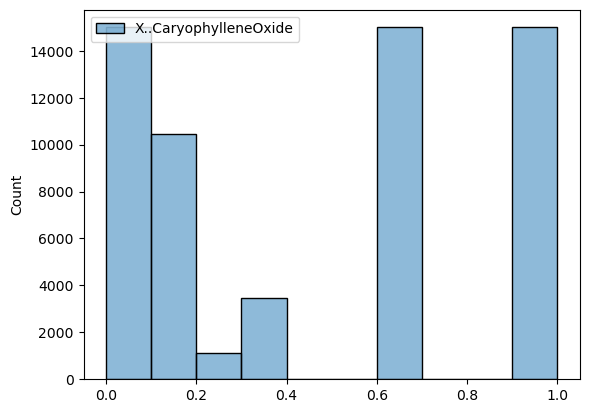

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.04594894035884835

In [11]:
mean_squared_error(y_val, y_pred_mlp)

0.01098660460350317

In [12]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.10481700531642359

In [13]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.9803950967010329

In [14]:
#val
r2_score(y_val, y_pred_mlp)

0.9279785089526529

Residual plots for each target variable

Feature Selection

In [15]:
rfreg = RandomForestRegressor()

In [16]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [17]:
selector.estimator_.feature_importances_

array([8.14146367e-04, 3.42985652e-04, 5.54495877e-04, 7.24863463e-04,
       7.70741735e-04, 1.15458704e-03, 1.63535013e-03, 1.84048074e-03,
       4.46899466e-04, 1.21859502e-03, 4.62261436e-04, 3.01119100e-02,
       1.38554068e-03, 2.06152141e-03, 1.99233599e-04, 3.22791034e-04,
       6.14872749e-04, 9.30428879e-04, 1.11261902e-04, 8.78157037e-04,
       1.52230226e-03, 1.33736457e-03, 1.28859822e-03, 1.79465009e-04,
       1.51402631e-04, 1.54018920e-04, 6.03748902e-04, 3.40311960e-04,
       6.38521330e-04, 1.04022391e-04, 2.59775296e-03, 7.61666562e-04,
       9.17304882e-04, 3.21475788e-04, 1.93301179e-03, 3.96862724e-04,
       5.58282872e-05, 6.79635689e-03, 1.60936376e-04, 2.10975813e-03,
       3.45093373e-04, 1.40649420e-03, 3.68758758e-04, 2.35451182e-03,
       6.05847527e-04, 3.80372891e-04, 1.25013045e-03, 4.69575070e-04,
       1.41076072e-03, 1.99268418e-04, 1.10711251e-03, 6.09685734e-04,
       5.50400889e-04, 2.39022301e-04, 6.08919352e-04, 2.47824696e-04,
      

In [18]:
selector.threshold_

0.0021321961620469083

In [19]:
mask = selector.get_support()

In [20]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
        True, False,

In [21]:
selected_features = X.columns[mask]

In [22]:
selected_X = df_mlp[selected_features]
selected_X

,tfidf_11,tfidf_30,tfidf_37,tfidf_43,tfidf_73,tfidf_78,tfidf_90,tfidf_93,tfidf_98,tfidf_104,...,cheese,diesel,earthy,grape,lemon,orange,pine,sweet,vanilla,woody
0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,1,0,0,1,0,0,1,0,0,0
1,0.165804,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.165804,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.115840,0.0,0.000000,0.000000,0.0,0.0,0.0,0.106241,0.0,0.0,...,1,0,1,0,0,0,0,0,1,0
4,0.111610,0.0,0.098314,0.205162,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59996,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59997,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59998,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
selected_X.columns.to_list()

['tfidf_11',
 'tfidf_30',
 'tfidf_37',
 'tfidf_43',
 'tfidf_73',
 'tfidf_78',
 'tfidf_90',
 'tfidf_93',
 'tfidf_98',
 'tfidf_104',
 'tfidf_115',
 'tfidf_116',
 'tfidf_119',
 'tfidf_121',
 'tfidf_123',
 'tfidf_126',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_158',
 'tfidf_160',
 'tfidf_162',
 'tfidf_167',
 'tfidf_168',
 'tfidf_178',
 'tfidf_181',
 'tfidf_199',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_215',
 'tfidf_216',
 'tfidf_223',
 'tfidf_230',
 'tfidf_236',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_258',
 'tfidf_263',
 'tfidf_267',
 'tfidf_278',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_286',
 'tfidf_295',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_326',
 'tfidf_329',
 'tfidf_337',
 'tfidf_342',
 'tfidf_343',
 'tfidf_345',
 'tfidf_350',
 'tfidf_357',
 'tfidf_362',
 'tfidf_366',
 'tfidf_367',
 'hybrid',
 'creative',
 'dry eyes',
 'energetic',
 'euphoric',
 'focused',
 'happy',
 'relaxed',
 'sleepy',
 'uplifted',
 'blueberry',
 'che

In [24]:
import joblib

joblib.dump(selected_X, "selected_X_mlp_tfidf_carox.pkl")
joblib.dump(selector, "selector_mlp_tfidf_carox.pkl")

['selector_mlp_tfidf_carox.pkl']

Train test split (after Feature Selection)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [26]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [27]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.08530684017932733

In [29]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.9277672285433161

In [30]:
#val
r2_score(y_val, y_pred_mlpreg)

0.8482734355236786

Hyperparameter Tuning

In [31]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'],
              'max_iter': [200, 500, 1000]
              }

In [32]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [33]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perce

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv.best_params_

{'max_iter': 200, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [35]:
joblib.dump(rscv, "rscv_mlp_tfidf_carox.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_tfidf_best_params_carox.pkl")

['rscv_mlp_tfidf_best_params_carox.pkl']

MLP fit (after hyperparameter tuning)

In [36]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter = 200, hidden_layer_sizes=(50,100,50), activation = 'relu', early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.05947922298388246

In [38]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.013829731770905953

In [39]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.11759987997828039

In [40]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.9581093197471806

In [41]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.9092114029910969

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [42]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [43]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_tfidf_carox.pkl")
joblib.dump(y_test, "y_test_mlpreg_tfidf_carox.pkl")

['y_test_mlpreg_tfidf_carox.pkl']

In [44]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.05866153759127347

In [45]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.013747381739936624

In [46]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.11724922916563939

In [47]:
r2_score(y_test, y_pred_mlpreg_test)

0.9103674827831114

Error analysis

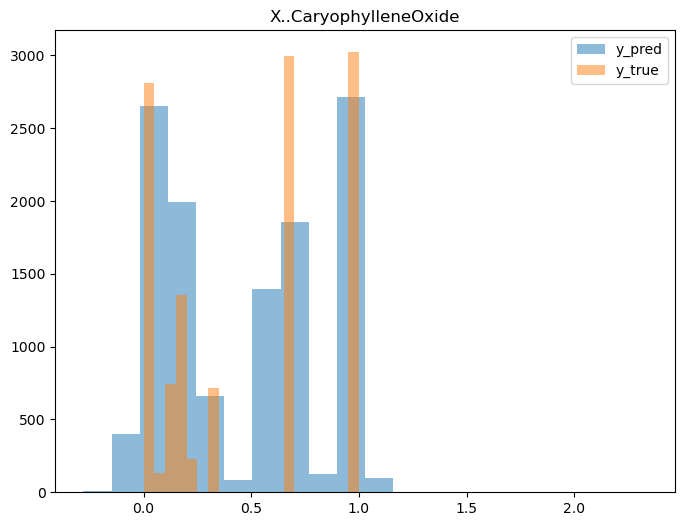

<Figure size 640x480 with 0 Axes>

In [48]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CaryophylleneOxide"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_tfidf_carox.png')

Pearson R

In [49]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.954
P-value: 0.000


<Axes: >

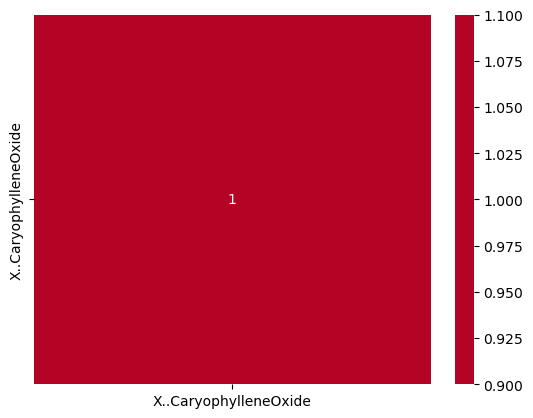

In [50]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)